In [1]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

#modified by Eugene Agichtein for CS325 Spring 2022


# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



(1797, 64)
image 0:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
label 0:  0


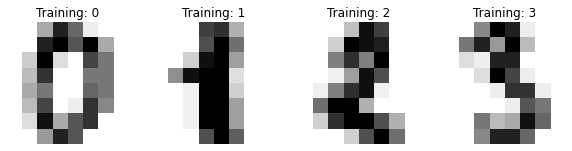

In [14]:
digits = datasets.load_digits()
print ( digits.data.shape)

print("image 0: ", digits.data[0])
print("label 0: ", digits.target[0])

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [145]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data[0])

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Lets try Naive Bayes classifier
https://scikit-learn.org/stable/modules/naive_bayes.html


In [146]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
predicted1 = nb.predict(X_test)


Lets see how Naive Bayes does on this task


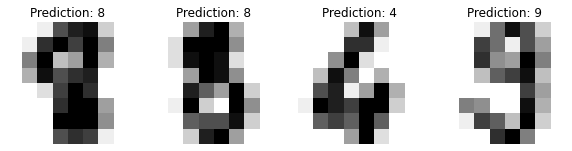

In [147]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted1):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [149]:
print(
    f"Classification report for classifier {nb}:\n"
    f"{metrics.classification_report(y_test, predicted1)}\n"
)

Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.90      0.66      0.76        91
           2       0.85      0.87      0.86        86
           3       0.90      0.84      0.87        91
           4       0.91      0.93      0.92        92
           5       0.84      0.70      0.77        91
           6       0.98      0.98      0.98        91
           7       0.89      0.90      0.89        89
           8       0.77      0.83      0.80        88
           9       0.65      0.88      0.75        92

    accuracy                           0.86       899
   macro avg       0.87      0.86      0.86       899
weighted avg       0.87      0.86      0.86       899




Now your turn: try a perceptron on full dataset! Start with an example from and modify:
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py


In [150]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

Load the full dataset: note, the first time will take a minute or so to fetch the data

In [151]:
from sklearn.datasets import fetch_openml
#mnist = fetch_openml(name='mnist_784')
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
print(X.shape)


(70000, 784)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)



First, lets see how Naive Bayes classifier does:

In [153]:
nb.fit(X_train, y_train)
predicted2 = nb.predict(X_test)

In [154]:
print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test, predicted2)}\n"
)


Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4911
           1       0.88      0.94      0.91      5544
           2       0.87      0.83      0.85      4896
           3       0.79      0.81      0.80      4986
           4       0.82      0.73      0.77      4768
           5       0.86      0.66      0.74      4384
           6       0.87      0.91      0.89      4780
           7       0.94      0.82      0.88      5072
           8       0.64      0.77      0.70      4757
           9       0.69      0.82      0.75      4902

    accuracy                           0.82     49000
   macro avg       0.83      0.82      0.82     49000
weighted avg       0.83      0.82      0.82     49000




Lets define a Multilayer perceptron with 40 hidden neurons: 28x28 inputs --> 40 hidden neurons --> 10 outputs (classes)

In [120]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Training set score: 0.959857
Test set score: 0.939408


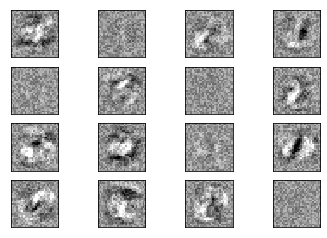

In [160]:
# this example MAY NOT converge if iterations not reached

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


In [161]:
predicted3=mlp.predict(X_test)


Classification report for classifier MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, max_iter=2,
              random_state=1, solver='sgd', verbose=10):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4911
           1       0.97      0.98      0.97      5544
           2       0.93      0.95      0.94      4896
           3       0.93      0.92      0.92      4986
           4       0.93      0.94      0.93      4768
           5       0.87      0.94      0.91      4384
           6       0.93      0.97      0.95      4780
           7       0.95      0.96      0.95      5072
           8       0.96      0.88      0.92      4757
           9       0.94      0.90      0.92      4902

    accuracy                           0.94     49000
   macro avg       0.94      0.94      0.94     49000
weighted avg       0.94      0.94      0.94     49000




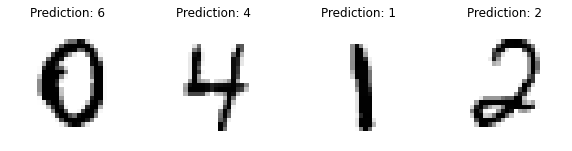

In [162]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted3):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predicted3)}\n"
)


Confusion matrix:
[[4728    0   14    2    8   53   72    4   25    5]
 [   2 5420   28   26    6   21    6    7   22    6]
 [  38   16 4638   32   37   37   25   47   23    3]
 [   7   10   80 4567    3  218   10   34   30   27]
 [   2   14   31    1 4486    9   83   21    7  114]
 [  23   12   16   71   24 4134   56   10   16   22]
 [  20   16   10    1   30   51 4640    3    9    0]
 [   4   21   75   23   42   12    2 4850    1   42]
 [  38   46   64  130   20  145   86   20 4165   43]
 [  25   22    5   65  182   58    4  114   24 4403]]


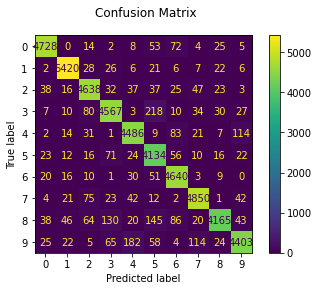

In [163]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted3)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

# load data_set, split
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

"""
Naive Bayes
"""


'\nNaive Bayes\n'

In [4]:

# experiments Multinomial Naive Bayes with different alpha 1 * 10^(-i) for i from 0 to 10
# it achieves best accuracy when alpha = 10^(-10)

alpha = 2e-10
nb = MultinomialNB(alpha=alpha)
nb.fit(X_train, y_train)
predicted = nb.predict(X_test)
print(f"Classification report for classifier {nb}:\n")
print(f"Accuracy = {accuracy_score(y_test, predicted)*100} %")

# print detailed report for the last experiment with best accuracy
print(f"{metrics.classification_report(y_test, predicted)}\n")


Classification report for classifier MultinomialNB(alpha=2e-10):

Accuracy = 82.43877551020408 %
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      4911
           1       0.89      0.94      0.91      5544
           2       0.87      0.83      0.85      4896
           3       0.79      0.81      0.80      4986
           4       0.83      0.73      0.78      4768
           5       0.85      0.66      0.75      4384
           6       0.88      0.92      0.90      4780
           7       0.94      0.82      0.88      5072
           8       0.64      0.77      0.70      4757
           9       0.69      0.82      0.75      4902

    accuracy                           0.82     49000
   macro avg       0.83      0.82      0.82     49000
weighted avg       0.83      0.82      0.83     49000


